# **CVPS20 // Working with Video Data in Python**

*November 17, 2020*

This notebook introduces modules to load frames from video files and concepts of working with data that has a temporal component including basic foreground/background separation techniques.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
plt.rcParams['figure.figsize'] = [10,8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gist_gray'

To read in the video data from video format files (e.g., `.mp4`), we will use the [OpenCV](https://opencv.org/) package,

In [17]:
fname = "/content/drive/MyDrive/cvps20/data/dot/cctv391.mp4"
#create a "capture of"
cap = cv2.VideoCapture(fname)

In [18]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

100.0

In [19]:
cv2.CAP_PROP_FRAME_COUNT

7

In [20]:
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

240.0

The `VideoCapture` object contains information about the video, but note that the syntax of OpenCV is a bit archaic (and has remnants of `C++` styling, its original design language),

In [21]:
vals = cap.read()

In [23]:
cap.read?

In [24]:
st, fr = cap.read()

This frame capture can be read frame by frame using the `.read()` method,

In [ ]:
plt.imshow(fr)

In [ ]:
#read in colors backwords, which causes the colors to be read in as RGB instead of BGR
plt.imshow(fr[:, :, ::-1])
#this is the '1st" frame, not the zeroth frame, because vals = cap.read() was already
#the 0 index frame read in

In [27]:
#restart counter
cap = cv2.VideoCapture(fname)

#parameters of the video
nframe = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
nrow = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
ncol = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

#create a container for the images
imgs = np.zeros((nframe, nrow, ncol, 3), dtype = float)

#loop through frame
for ii in range(nframe):
  imgs[ii] = cap.read()[1][:,:,::-1] / 255.


In [28]:
imgs.shape

(100, 240, 352, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


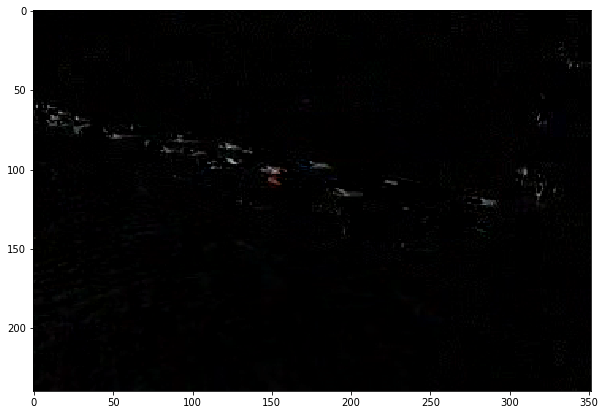

In [36]:
#display a frame
fig, ax = plt.subplots()
ax.imshow(imgs[1] - imgs[0])
fig.show()

In [37]:
from matplotlib import animation

In [38]:
#define  how the animation should be encoded within the HTML
plt.rcParams['animation.html'] = 'jshtml'

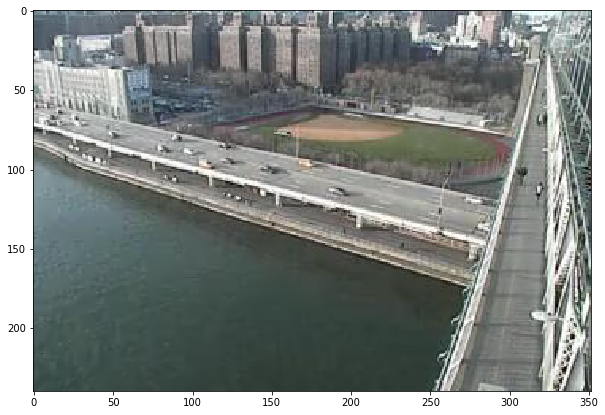

In [39]:
fig, ax = plt.subplots()
ax.imshow(imgs[0])
im = ax.imshow(imgs[0])

def animate(i):
  im.set_data(imgs[i])

#create animation
ani = animation.FuncAnimation(fig, animate, frames = nframe)

In [40]:
ani

Output hidden; open in https://colab.research.google.com to view.

In [41]:
imgs.shape

(100, 240, 352, 3)

In [42]:
imgsL = imgs.mean(axis = -1)

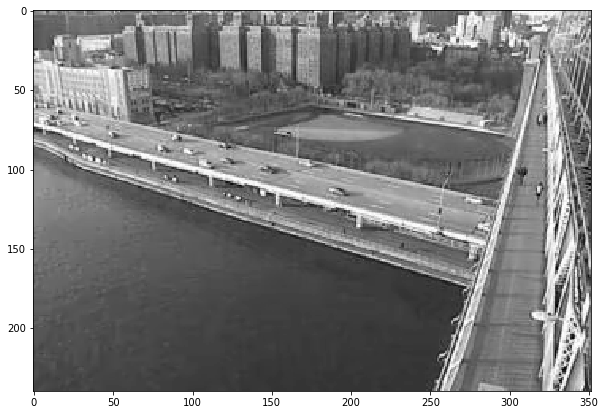

In [43]:
plt.imshow(imgsL[0])

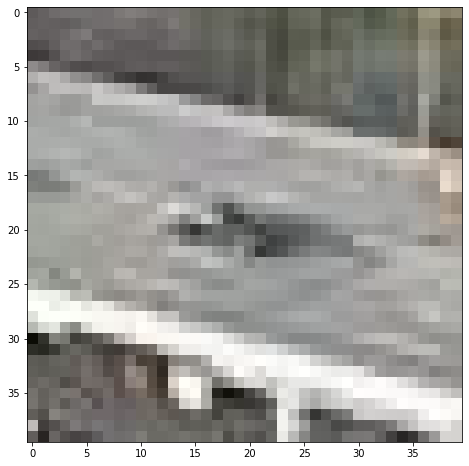

In [44]:
plt.imshow(imgs[0, 80:120, 130:170])

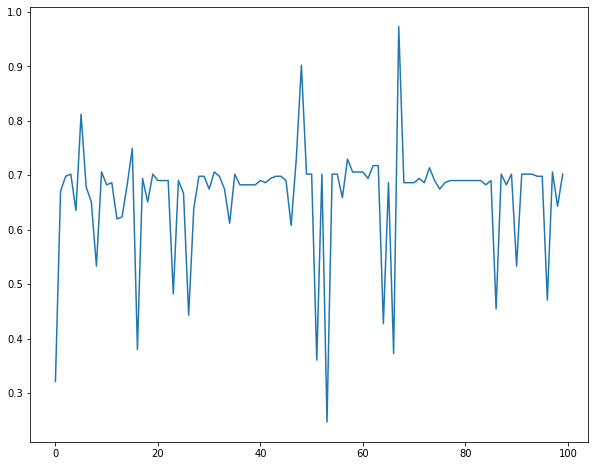

In [45]:
#all frames, red
#spikes are cars passing
plt.plot(imgs[:, 100, 150, 0])

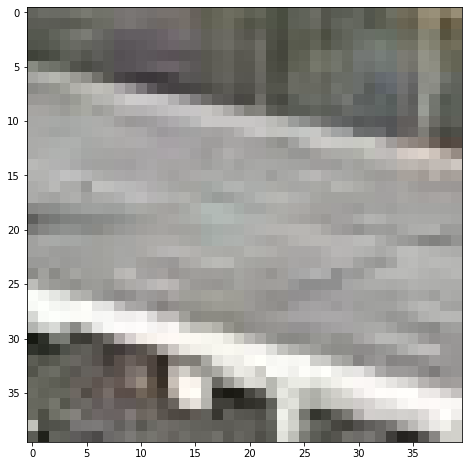

In [46]:
plt.imshow(imgs[80, 80:120, 130: 170])

This is now a `numpy` array and can be treated as such, with a small catch,

If we want to read in the whole videos (or the first `N` frames), it's typically best practices to create an empty array, and then load each frame into that array,

Now let's view the whole video using `matplotlib`'s `animation` sub-module

For some of the processing we'll do below, we'll want to consider luminosity images instead of 3 color,

Now, let's look at the ***timeseries*** one particular pixel

Let's isolate those fluctuations,

### **Create a mean <u>*image*</u>, display it, and subtract from all frames (taking the absolute value).**

### **Apply a median filter (in the temporal dimension) to each pixel in the luminosity images and threshold.**

Now let's make a ***very basic*** (and not particularly accurate) traffic counter synthesizing these techniques with our old thresholding methods,